## TF tunner samples

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
from processing import load_image_dataset
x_masked_train, y_masked_train = load_image_dataset('Datasets/espe/masked/train', (40, 40), False)
x_masked_test, y_masked_test = load_image_dataset('Datasets/espe/masked/test', (40, 40), False)
x_masked_validation, y_masked_validation = load_image_dataset('Datasets/espe/masked/validation', (40, 40), False)

In [3]:
from processing import slice_labels
x_masks_train, y_masks_train = load_image_dataset('Datasets/espe/masks/train', (40, 40), False)
x_masks_test, y_masks_test = load_image_dataset('Datasets/espe/masks/test', (40, 40), False)
x_masks_validation, y_masks_validation = load_image_dataset('Datasets/espe/masks/validation', (40, 40), False)

In [4]:
x_masked_train.shape, x_masks_train.shape

((10507, 40, 40, 3), (10507, 40, 40, 3))

In [5]:
import numpy as np
x_masks, y_masks = np.concatenate((x_masks_train, x_masks_validation), axis=0), np.concatenate((y_masks_train, y_masks_validation), axis=0)
x_data, y_data = np.concatenate((x_masked_train, x_masked_validation), axis=0), np.concatenate((y_masked_train, y_masked_validation), axis=0)

In [6]:
#x_masks.shape == x_data.shape, y_masks.shape == y_data.shape
print(x_masks.shape)
print(x_data.shape)
print(y_masks.shape)
print(y_data.shape)
x_masks.shape == x_data.shape, y_masks.shape == y_data.shape

(13034, 40, 40, 3)
(13034, 40, 40, 3)
(13034, 7)
(13034, 7)


(True, True)

### Training model with masked images

In [7]:
from utils.Models2 import image_classification
from training.utils import cv_training

model = None

model = image_classification((40, 40, 3))

cv_training(model = model , x_data=[x_data], y_data=y_data, path_to_save_results='models/own/experiments/Pamela/color/experiment_0')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 6951 samples, validate on 1738 samples
Epoch 1/20
6951/6951 [==============================] - 3s 380us/sample - loss: 15.7274 - acc: 0.7631 - val_loss: 12.9058 - val_acc: 0.7422
Epoch 2/20
6951/6951 [==============================] - 1s 160us/sample - loss: 0.1005 - acc: 0.9853 - val_loss: 12.4548 - val_acc: 0.7716
Epoch 3/20
6951/6951 [==============================] - 1s 145us/sample - loss: 0.0745 - acc: 0.9888 - val_loss: 14.4780 - val_acc: 0.7779
Epoch 4/20
6951/6951 [==============================] - 1s 146us/sample - loss: 0.0221 - acc: 0.9955 - val_loss: 13.6228 - val_acc: 0.8308
Epoch 5/20
6951/6951 [==============================] - 1s 145us/sample - loss: 0.0061 - acc: 0.9986 - val_loss: 12.7460 - val_acc: 0.7808
Epoch 6/20
6951/6951 [==============================] - 1s 145us/sample - loss: 4.8978e-04 - acc: 0.9997 - val_loss: 13.4954 - val_acc: 0.8101
Epoch 7/20
6951/6951 [==========

<Figure size 432x288 with 0 Axes>

### Training model with masks

In [7]:
from utils.Models2 import silhouette_cnn_model
from training.utils import cv_training

model = None

model = silhouette_cnn_model((40, 40, 3))

cv_training(model = model , x_data=[x_masks], y_data=y_masks, path_to_save_results='models/own/experiments/Pamela/silueta_2/experiment_0')

Train on 6951 samples, validate on 1738 samples
Epoch 1/20
6951/6951 [==============================] - 5s 752us/sample - loss: 8.1649 - acc: 0.2082 - val_loss: 1.9510 - val_acc: 0.1904
Epoch 2/20
6951/6951 [==============================] - 2s 279us/sample - loss: 1.5151 - acc: 0.4281 - val_loss: 2.2288 - val_acc: 0.2376
Epoch 3/20
6951/6951 [==============================] - 2s 219us/sample - loss: 1.1283 - acc: 0.5952 - val_loss: 2.2699 - val_acc: 0.2675
Epoch 4/20
6951/6951 [==============================] - 2s 233us/sample - loss: 0.9180 - acc: 0.6726 - val_loss: 2.5383 - val_acc: 0.2848
Epoch 5/20
6951/6951 [==============================] - 2s 288us/sample - loss: 0.7635 - acc: 0.7288 - val_loss: 2.5234 - val_acc: 0.2854
Epoch 6/20
6951/6951 [==============================] - 1s 201us/sample - loss: 0.6530 - acc: 0.7679 - val_loss: 2.5989 - val_acc: 0.2992
Epoch 7/20
6951/6951 [==============================] - 1s 186us/sample - loss: 0.6030 - acc: 0.7868 - val_loss: 2.8875 - va

<Figure size 432x288 with 0 Axes>

### Training model with masks - color

In [8]:
from utils.Models2 import multi_input_model
from training.utils import cv_training

model = multi_input_model()

cv_training(model = model , x_data=[x_data, x_masks], y_data=y_masks, path_to_save_results='models/own/experiments/Pamela/color_silueta/experiment_0')

Train on 6951 samples, validate on 1738 samples
Epoch 1/20
6951/6951 [==============================] - 3s 459us/sample - loss: 8.1734 - acc: 0.6836 - val_loss: 2.0701 - val_acc: 0.8188
Epoch 2/20
6951/6951 [==============================] - 2s 254us/sample - loss: 0.0576 - acc: 0.9807 - val_loss: 2.6080 - val_acc: 0.8090
Epoch 3/20
6951/6951 [==============================] - 2s 252us/sample - loss: 0.0322 - acc: 0.9919 - val_loss: 3.7762 - val_acc: 0.8280
Epoch 4/20
6951/6951 [==============================] - 2s 253us/sample - loss: 0.0603 - acc: 0.9843 - val_loss: 3.6561 - val_acc: 0.7722
Epoch 5/20
6951/6951 [==============================] - 2s 253us/sample - loss: 0.0165 - acc: 0.9958 - val_loss: 4.5877 - val_acc: 0.8297
Epoch 6/20
6951/6951 [==============================] - 2s 253us/sample - loss: 0.0070 - acc: 0.9976 - val_loss: 4.3585 - val_acc: 0.8395
Epoch 7/20
6951/6951 [==============================] - 2s 252us/sample - loss: 0.0172 - acc: 0.9961 - val_loss: 3.7161 - va

<Figure size 432x288 with 0 Axes>

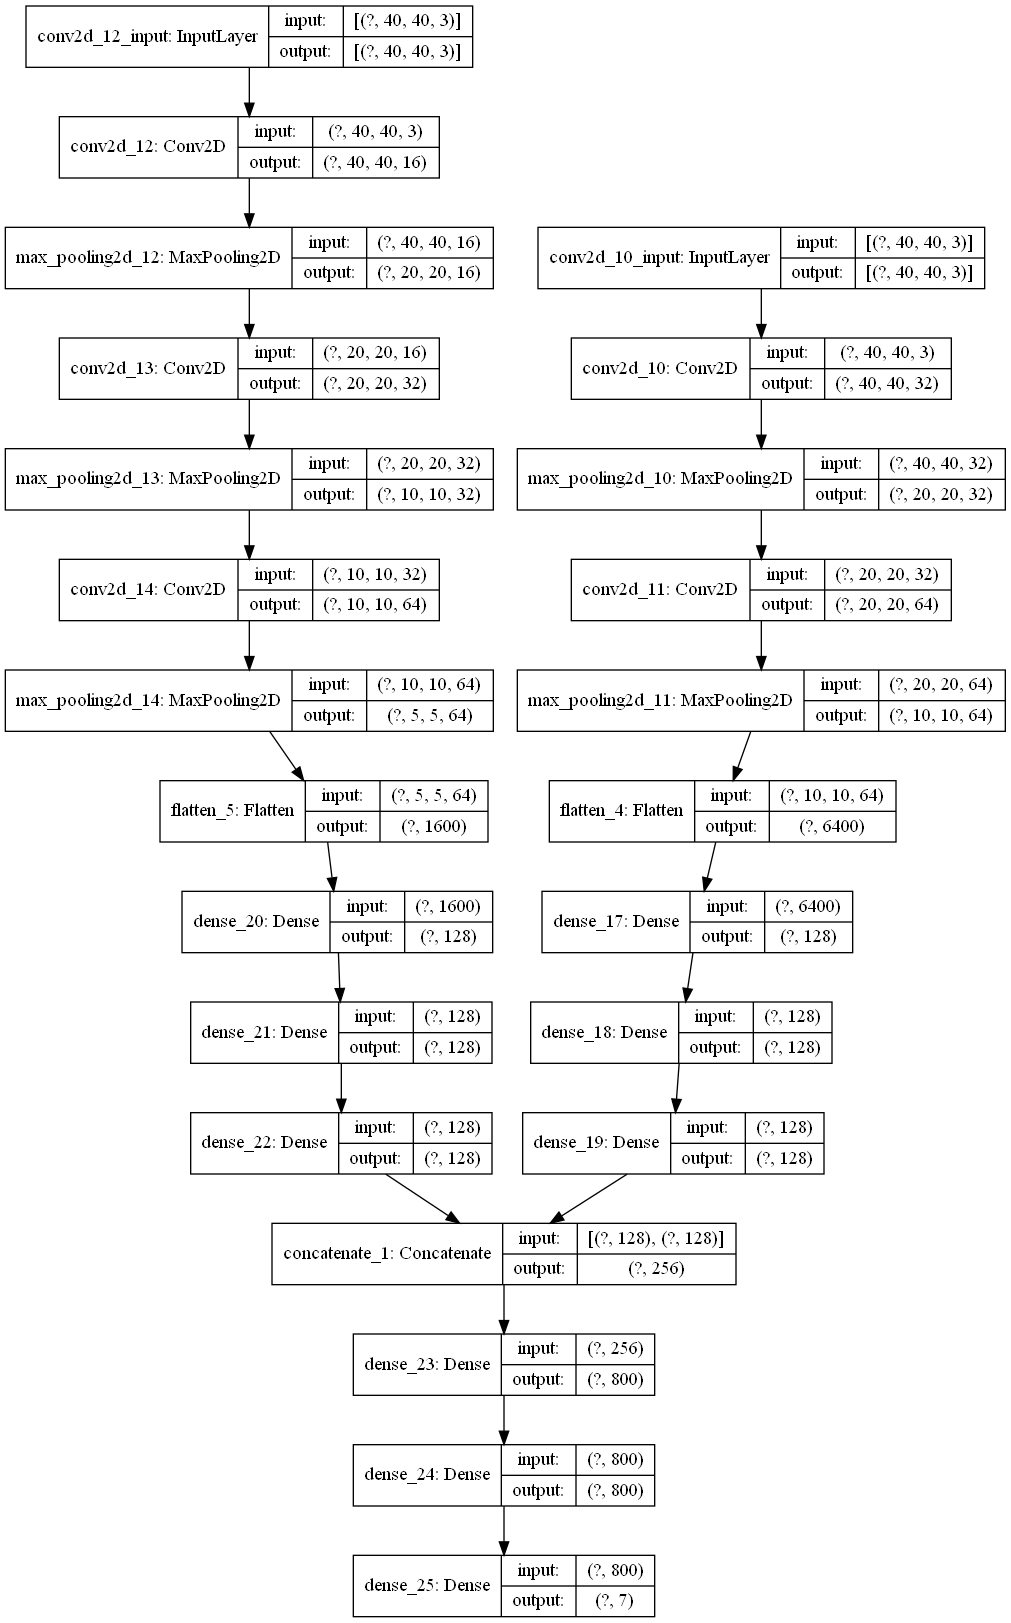

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
model = load_model('models/own/experiments/Pamela/silueta_2/experiment_0/model_3.h5')
plot_model(model, show_shapes=True)